<a href="https://colab.research.google.com/github/JosiasRuiz/AdvanceML/blob/main/TC4033_Activity1b_Group_43_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.

## Group 43

* Andrea M. Ruiz G.    - A01794631
* Josías Ruiz P.       - A00968460
* Saúl Y. Salgueiro L. - A0XXXXXXX
* Jesús Á. Salazar M.  - A00513236

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

Import main libraries to run the data prep

In [ ]:
alphabet = list(string.ascii_lowercase)

Definition of ascii to build the clases to catalog

Encoded ASL images can be found in the following link

https://drive.google.com/drive/folders/1l_Git-oU6JL25Pf0ZQ1xm37GrXwFq_Om

In [ ]:
index = 0
labelledDfsByLabel = {}

for letter in alphabet:
  df = pd.read_csv(letter.upper() + '.csv')
  df = df.assign(label = [*map(lambda _ : index, [*range(len(df))])])
  labelledDfsByLabel[index] = df
  index += 1

The dataset was mapped in grayscale, we applied resizing to increase velocity of model train, the final image size was 28x28, and each pixel was mapped.

The output dataset is 784 data columns and 1 for label.

In [ ]:
labelledDfsByLabel[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,41,45,48,53,57,54,53,47,41,46,...,131,129,130,130,130,129,128,125,109,0
1,21,16,16,15,14,14,13,12,11,11,...,178,182,185,188,191,193,198,204,182,0
2,69,87,92,95,98,100,106,108,125,146,...,70,73,103,130,134,130,141,146,135,0
3,38,41,44,49,52,50,50,44,39,42,...,216,126,106,98,125,123,122,119,104,0
4,70,88,94,95,97,100,106,108,124,146,...,102,113,120,126,128,117,129,146,135,0


In [ ]:
trainDf = pd.DataFrame()
validDf = pd.DataFrame()

In [ ]:
splitSize = int(3000 * .80)
splitSize

2400

Split size for validDF is 2400 images

In [ ]:
# sums dataframes
for label in labelledDfsByLabel.keys():
  df = labelledDfsByLabel[label]
  trainDf = pd.concat([trainDf, df[:splitSize]])
  validDf = pd.concat([validDf, df[splitSize:]])

In [ ]:
# Shuffles dataFrames
trainDf = trainDf.iloc[np.random.permutation(len(trainDf))]
validDf = validDf.iloc[np.random.permutation(len(validDf))]

DF shuffle to randomize data presented to the model during training. This helps the model to learn the general patterns in the data.

In [ ]:
trainDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
1798,69,88,92,95,97,99,107,107,125,145,...,159,156,152,148,144,140,140,146,135,2
1651,88,102,92,85,77,69,63,56,53,48,...,116,118,119,120,121,119,116,116,104,8
1233,74,97,100,102,103,107,114,114,133,151,...,65,59,89,153,153,149,149,154,142,4
2344,73,89,91,99,104,108,117,120,119,115,...,97,97,97,98,98,98,99,99,89,24
56,84,101,94,86,78,70,61,56,51,46,...,109,109,109,109,109,107,104,104,63,15


In [ ]:
validDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
2928,48,56,58,63,68,65,63,57,51,56,...,146,143,144,144,144,143,142,140,122,3
2566,72,84,82,82,84,85,87,87,86,85,...,51,57,61,98,104,105,105,104,93,8
2702,81,98,91,83,77,70,64,59,55,51,...,141,143,145,147,148,148,146,148,131,25
2633,39,44,47,53,56,52,51,45,40,45,...,56,104,127,128,128,127,124,122,108,4
2691,20,15,14,14,13,13,12,11,11,11,...,125,79,54,47,47,46,53,154,171,9


In [ ]:
len(trainDf)

62400

In [ ]:
len(validDf)

15600

Train DF 62400 images

Validation DF 15600 images

In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline

Main libraries for model train

In [ ]:
# copies original dataframes
train_df = trainDf.copy()
valid_df = validDf.copy()

Bkup DF for next processing steps

In [ ]:
# creates Y_train and Y_val date series
Y_train = np.array(train_df['label'])
Y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']

Extraction of dataset label

In [ ]:
# creates X_train and X_val date series
X_train = train_df.values.astype(np.float32)
X_val = valid_df.values.astype(np.float32)

In [ ]:
def split_val_test(x: np.array, y: np.array, pct = 0.5, shuffle = True) -> (np.array, np.array, np.array, np.array):
  """
    Parameters
      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      pct : float, optional
        Specify the percentage of data that should be used for the validation dataset

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      x_val, y_val, x_test, y_test
        splitted validation and test datasets
  """
  size = len(x)                                 # computes size of the given x np.array (assuming that x and y have the same save)
  valSize = int(size * pct)                     # computes the size of np.array meant for validation

  if shuffle:                                   # if shuffle equals true, then suffle all items in the given x and y
    shuffledIndexes = np.arange(size)           # creates an "size"-length array (items are 0 to size - 1)
    np.random.shuffle(shuffledIndexes)          # shuffling indexes
    x = x[shuffledIndexes]                      # shuffling x and y in union
    y = y[shuffledIndexes]

  x_val = x[:valSize]                           # partition x_val, y_val based on valSize
  y_val = y[:valSize].reshape(valSize, 1)
  x_test = x[valSize:]                          # assigning x_test, y_test to the remaining items
  y_test = y[valSize:].reshape(valSize, 1)

  return x_val, y_val, x_test, y_test

Split data in 3 categories for model training train, validation and test.

In [ ]:
# partitioning X_val and Y_val
x_val, y_val, x_test, y_test = split_val_test(X_val, Y_val)

In [ ]:
# logs partitioned dataset shapes
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(7800, 784)
(7800, 1)
(7800, 784)
(7800, 1)


In [ ]:
alphabet = list(string.ascii_lowercase)
#alphabet.remove('j')
#alphabet.remove('z')
print(len(alphabet))

26


26 clases to train NN clasificator

### Normalise

In [ ]:
def normalise(x) -> np.array:
  """
    Parameters
      x : np.array, required
        Specify the np.array to normalize

    Return
      normalized_x
        normalized np.array
  """

  mean = x.mean()             # Compute the arithmetic mean.
  std = x.std()               # Compute the standard deviation.

  return (x - mean) / std     # normalizing the given np.array

In [ ]:
# normalizes x_train, x_val, and x_test

X_train = normalise(X_train)
x_val = normalise(x_val)
x_test = normalise(x_test)

Normalize function scales vectors individually to a unit norm so that the vector has a length of one.

### Draw samples

In [ ]:
def displaySamples(samplesToDisplay, size, dim):
  """
    Parameters
      samplesToDisplay : list<str>, required
        Specify the letters to display

      size : int, required
        Specify the number of samples per letter to display

      dim : (W, H), required
        Specify the image dimentions
  """

  MAX_ROWS = size                                                 # specify the number of rows in the plot grid
  MAX_COLS = len(samplesToDisplay)                                # specify the number of columns in the plot grid
  sampleImgIndexesByLetterIndex = {}                              # holds the image sample indexes based on the letter index

  for i in range(0, MAX_COLS):
    res = np.where(Y_train == i)                                  # queries for an specify value (letter index) in the Y_train np_array
    sampleImgIndexesByLetterIndex[i] = res[0][:MAX_ROWS]          # stores the indexes that matched the query

  _, axes = plt.subplots(                                         # init fig image grid
      ncols = MAX_COLS,
      nrows = MAX_ROWS,
      figsize = (10, 2)
  )

  col = 0
  for key in sampleImgIndexesByLetterIndex:                       # iterate for each letter in order to display its samples
    sampleImgIndexes = sampleImgIndexesByLetterIndex[key]
    for row in range(0, MAX_ROWS):
        axes[row][col].imshow(X_train[sampleImgIndexes[row]].reshape(dim[0], dim[1]), cmap='gray', aspect="auto")   # display image
        axes[row][col].axis("off")
    col += 1
  plt.subplots_adjust(wspace=.05, hspace=.05)
  plt.show()

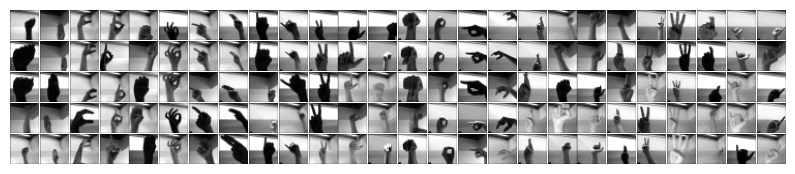

In [ ]:
displaySamples(alphabet, 5, (28, 28))

Samples of dataset to be classified

### Model

$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Utilitary functions

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True) -> (np.array, np.array):
  """
    Parameters
      mb_size : int, required
        Specify mini batch size to process

      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      normalized_x
        normalized np.array
  """


  assert x.shape[0] == y.shape[0], 'X and y must be the same size'
  total_data = x.shape[0]                                                           # compute size of dataset
  if shuffle:                                                                       # if shuffle is true, then shuffle x and y in union
      idxs = np.arange(total_data)
      np.random.shuffle(idxs)
      x = x[idxs]
      y = y[idxs]
  return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))  # compute mini batch

### Custom Linear, ReLU, and Sequential classes

In [ ]:
# np_tensor no operation
class np_tensor(np.ndarray): pass

#### Linear Class

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

#### ReLU Class

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)

    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

#### Sequential Class

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x

    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        return np.argmax(self.__call__(X))

#### Cost function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    #exp_scores = np.exp(x - np.max(x))
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # computing cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # computing gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

#### Training loop

In [ ]:
def accuracy(x, y, mb_size, model):
  correct = 0
  total = 0
  for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
      pred = model(x.T.view(np_tensor))
      correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
      total += pred.shape[1]
  return correct/total

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
  for epoch in range(epochs):
    for i, (x, y) in enumerate(create_minibatches(mb_size, X_train, Y_train)):
        scores = model(x.T.view(np_tensor))
        _, cost = softmaxXEntropy(scores, y)
        model.backward()
        model.update(learning_rate)
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')

### Create your model and train it

In [ ]:
# number of pixels
PIXELS = X_train.shape[1]
PIXELS

784

Images were transformed to a vector size 1x784

In [ ]:
# number of outputs
OUTPUT = len(alphabet)
OUTPUT

26

26 clases to classify the images

In [ ]:
# define hyper parameters
mb_size = 512               # specify the mini batch size to be process
learning_rate = 1e-4        # specify the learning rate
epochs = 20                 # defines the number of times that the learning algorithm will work

In [ ]:
# creates an instance of Sequential_layers
model = Sequential_layers([Linear(PIXELS, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, OUTPUT)])

With the legacy architecture of the minimist exercise we could get an accuracy of 87.4%. We used Linear layer and ReLu layers to train our models. The initial layer has 784 neurons based on the vector image size 28x28 and the last layer has 26 clases.

In [ ]:
# train model
train(model, epochs, mb_size, learning_rate)

cost: 4.34021117029911, accuracy: 0.048846153846153845
cost: 3.674210029675283, accuracy: 0.0541025641025641
cost: 3.524528449262182, accuracy: 0.05820512820512821
cost: 3.3867246194008533, accuracy: 0.06717948717948719
cost: 3.324658708913855, accuracy: 0.08012820512820513
cost: 3.280034232712919, accuracy: 0.07166666666666667
cost: 3.233961701558128, accuracy: 0.0823076923076923
cost: 3.2287245443931534, accuracy: 0.08794871794871795
cost: 3.1538878859804185, accuracy: 0.09794871794871794
cost: 3.152361863963006, accuracy: 0.10846153846153846
cost: 3.075502778685219, accuracy: 0.11346153846153846
cost: 3.1191879713879285, accuracy: 0.1226923076923077
cost: 3.074252540392952, accuracy: 0.12538461538461537
cost: 3.008265955525097, accuracy: 0.13435897435897437
cost: 3.0030274913802355, accuracy: 0.14102564102564102
cost: 3.046638735574524, accuracy: 0.1385897435897436
cost: 2.920667909347672, accuracy: 0.1494871794871795
cost: 2.9249438460928254, accuracy: 0.15320512820512822
cost: 2.9

the resulting trained model reports a 87.4% of accuracy

### Test your model on Random data from your test set

In [ ]:
idx = np.random.randint(len(y_test))                    # genering random index
pred = model.predict(x_test[idx].reshape(-1, 1))        # making prediction

In [ ]:
# logs randomly generated index
idx

916

In [ ]:
# logs real value
alphabet[y_test[idx].reshape(-1, 1)[0][0]]

'q'

In [ ]:
# logs predicted index
pred

16

In [ ]:
# logs value based on predicted index
alphabet[pred]

'q'

# Conclusion

The ASL dataset consists of images representing sign language gestures, and the goal is to recognize and classify these gestures. This multilayer neural network is able to represent and interpret the complex patterns in these images, reporting an accuracy of 87.5% .

We identify some critical elements for this models training, such as the image size need resizing from 200x200 to 28x28, image color composition changed from RGB to grayscale. This elements were critical for speed and agility to model training.

We reduce the model dataset used for this model training for considering just ascii_lowercase labels.

We tried with distinct hyperpameters to reach the requiered performance for this activity but a search could be considered to increase accuracy for the model.

We also investigate in some papers that a better image preparation with filtering, edge detection and some other tools for image processing could be used to increase the accuracy.

Finally, we could notice the great usage of NN for model clasification beacause we didnt perfomed too many preparation of the dataset but acceptable model could reach in couple of hours.

**Bibliografia**

Verma, J. (2022, agosto 3). How to Normalize Data Using scikit-learn in Python. Digitalocean.com; DigitalOcean. https://www.digitalocean.com/community/tutorials/normalize-data-in-python

Tao, W., Leu, M., & Yin, Z. (2018). American Sign Language alphabet recognition using Convolutional Neural Networks with multiview augmentation and inference fusion. Engineering Applications of Artificial Intelligence, 76, 202–213. https://doi.org/10.1016/j.engappai.2018.09.006